<a href="https://colab.research.google.com/github/sap0408/2048/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import keras
keras.__version__

'2.3.1'

In [2]:
import numpy as np

# Número de pasos de tiempo en la secuencia de entrada
timesteps = 5

# Dimensionalidad de la secuencia de entrada.
input_features = 3

# Dimensionalidad del espacio de características de salida
output_features = 1

# Datos de entrada: aleatorio 
inputs = np.random.random((timesteps, input_features))
print('\nEntradas:\n'+str(inputs))

# Estado oculto inicial: un vector todo cero
state_t = np.zeros((output_features,))

# Crea matrices de pesos aleatorias
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')


Entradas:
[[7.32325265e-01 5.68420504e-04 7.00060108e-01]
 [1.46371323e-02 6.24447139e-01 6.25516817e-01]
 [3.55373293e-01 1.33792875e-01 4.88289044e-01]
 [3.40293574e-01 8.11193856e-01 7.81342363e-01]
 [4.12455007e-01 3.67300796e-01 9.99460570e-01]]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [3]:
# Procesa entradas
for input_t in inputs:
    print('Entrada:'+str(input_t))
    print('W:'+str(W))
    print('Estado oculto:'+str(state_t))
    print('U:'+str(U))
    print('b:'+str(b))
        
    # Combina la entrada con el estado actual para obtener la salida actual
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    
    print('Salida:'+str(output_t))
    
    # Almacena esta salida en una lista
    successive_outputs.append(output_t)
    
    # Actualiza el estado de la red para el siguiente paso de tiempo
    state_t = output_t
    print('\n********************************\n')
# La salida final es un tensor de forma 2D (pasos de tiempo, características de salida)
final_output_sequence = np.concatenate(successive_outputs, axis=0)
print('Salidas:')
print(final_output_sequence)

Entrada:[7.32325265e-01 5.68420504e-04 7.00060108e-01]
W:[[0.90869234 0.59263329 0.6801661 ]]
Estado oculto:[0.]
U:[[0.9669038]]
b:[0.99255406]
Salida:[0.97239516]

********************************

Entrada:[0.01463713 0.62444714 0.62551682]
W:[[0.90869234 0.59263329 0.6801661 ]]
Estado oculto:[0.97239516]
U:[[0.9669038]]
b:[0.99255406]
Salida:[0.99172223]

********************************

Entrada:[0.35537329 0.13379288 0.48828904]
W:[[0.90869234 0.59263329 0.6801661 ]]
Estado oculto:[0.99172223]
U:[[0.9669038]]
b:[0.99255406]
Salida:[0.99074936]

********************************

Entrada:[0.34029357 0.81119386 0.78134236]
W:[[0.90869234 0.59263329 0.6801661 ]]
Estado oculto:[0.99074936]
U:[[0.9669038]]
b:[0.99255406]
Salida:[0.99712622]

********************************

Entrada:[0.41245501 0.3673008  0.99946057]
W:[[0.90869234 0.59263329 0.6801661 ]]
Estado oculto:[0.99712622]
U:[[0.9669038]]
b:[0.99255406]
Salida:[0.99686873]

********************************

Salidas:
[0.97239516 

In [0]:
from keras.layers import SimpleRNN

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()
Model: "sequential_2"

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # Esta última capa solo devuelve las últimas salidas.
model.summary()
Model: "sequential_3"

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [9]:
# Cantidad de palabras a considerar como características
max_features = 10000  
# Cortar textos después de este número de palabras (entre las 
# principales palabras más comunes de max_features)
maxlen = 500  
batch_size = 32

print('Cargando data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), ' secuencias de entrenamiento')
print(len(input_test), ' secuencias de prueba')

print('Ajustando suencias')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('Train:', input_train.shape)
print('Test:', input_test.shape)

Cargando data...
17465344/17464789 [==============================] - 2s 0us/step
25000  secuencias de entrenamiento
25000  secuencias de prueba
Ajustando suencias
Train: (25000, 500)
Test: (25000, 500)


In [10]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6431 - acc: 0.6127 - val_loss: 0.4984 - val_acc: 0.7776
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.4144 - acc: 0.8239 - val_loss: 0.3993 - val_acc: 0.8286
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2955 - acc: 0.8829 - val_loss: 1.1597 - val_acc: 0.5994
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2358 - acc: 0.9108 - val_loss: 0.3371 - val_acc: 0.8732
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1659 - acc: 0.9413 - val_loss: 0.3541 - val_acc: 0.8698
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1188 - acc: 0.9584 - val_loss: 0.5034 - val_acc: 0.8140
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0844 - acc: 0.9716 - val_loss: 0.4343 - val_acc:

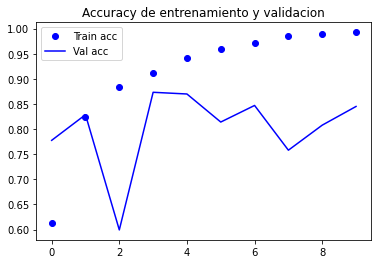

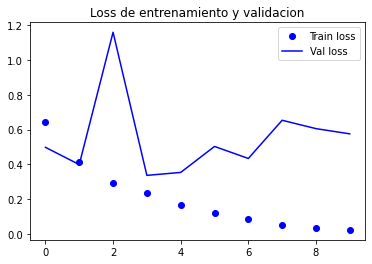

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Train acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.title('Accuracy de entrenamiento y validacion')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Loss de entrenamiento y validacion')
plt.legend()

plt.show()